In [1]:
# %matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 20)

import networkx as nx
import matplotlib.pyplot as plt
import pickle
import numpy as np
from skimage import data, io, filters
from skimage.feature import canny
from scipy import ndimage as ndi
from skimage.filters import sobel
from skimage.morphology import watershed
import cv2
from scipy.misc import imread, imshow
from scipy.ndimage import label
from scipy import asarray, ones, vstack, hstack
from sys import stdout

Populating the interactive namespace from numpy and matplotlib


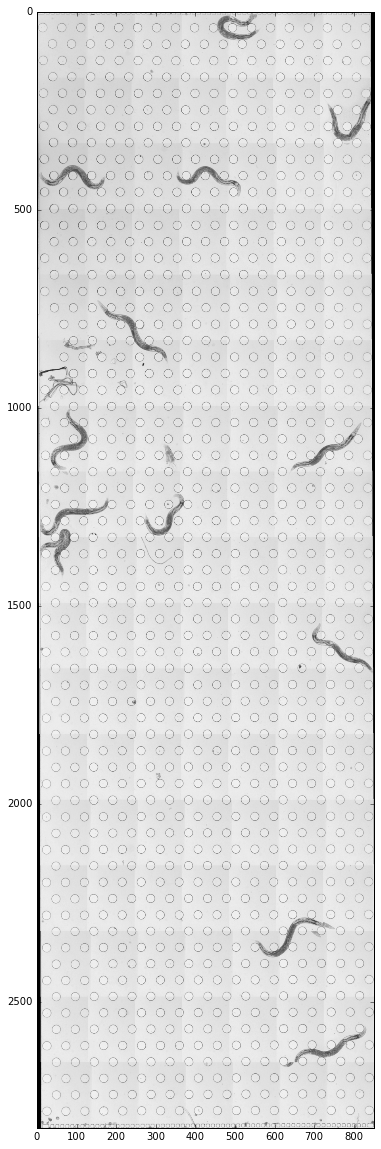

In [103]:
# filename = os.path.join(skimage.data_dir, 'moon.png')
filename = 'test.tif'
# filename = 'A06-t1-bf.tif'
# filename = 'A06-t1-rfp.tif'
imf = io.imread(filename)
plt.imshow(imf,cmap='gray')

In [106]:
def basics(fname):
    worm = io.imread(fname)
#     type(worm)
#     worm.shape
#     worm.size
#     worm.min(), worm.max()
#     worm.mean()
    histo = np.histogram(worm, bins=np.arange(0, 256))
    plt.figure(1)
    plt.hist(histo)
    blur = cv2.blur(worm,(1,1))
#     plt.figure(2)
#     plt.imshow(worm, cmap='gray')
#     # Edge detection:
#     edges = canny(worm/50000.)
#     plt.figure(3)
#     plt.imshow(edges, cmap='gray')
#     # Fill edges
#     fill_worms = ndi.binary_fill_holes(edges)
#     plt.figure(4)
#     plt.imshow(fill_worms, cmap='gray')
    elevation_map = sobel(blur)
    plt.figure(5)
    plt.imshow(elevation_map, cmap='gray')
    markers = np.zeros_like(blur)
#     ### 14000, 33000 (previous values for markers)
#     markers[worm < 4000] = 1
#     markers[worm > 15000] = 2
    markers[worm < 14000] = 1
    markers[worm > 33000] = 2
    plt.figure(6)
    plt.imshow(markers, cmap=plt.cm.spectral, interpolation='nearest')
    segmentation = watershed(elevation_map, markers)
    plt.figure(7)
    plt.imshow(segmentation, cmap='gray', interpolation='nearest')
#     segmentation = ndi.binary_fill_holes(segmentation - 1)
#     labeled_worms, _ = ndi.label(segmentation)
#     plt.figure(8)
#     plt.imshow(labeled_worms, cmap='gray')
#     elevation_map2 = sobel(segmentation)
#     plt.figure(9)
#     plt.imshow(elevation_map2, cmap='gray')
#     histo = np.histogram(segmentation, bins=np.arange(0, 256))
#     plt.figure(10)
#     plt.hist(histo)
#     markers2 = np.zeros_like(segmentation)
#     markers2[segmentation < 2000000] = 1
#     markers2[segmentation > 2200000] = 2
#     plt.figure(11)
#     plt.imshow(markers2, cmap=plt.cm.spectral, interpolation='nearest')
#     segmentation2 = watershed(elevation_map2, markers2)
#     plt.figure(12)
#     plt.imshow(segmentation2, cmap='gray', interpolation='nearest')
    return segmentation

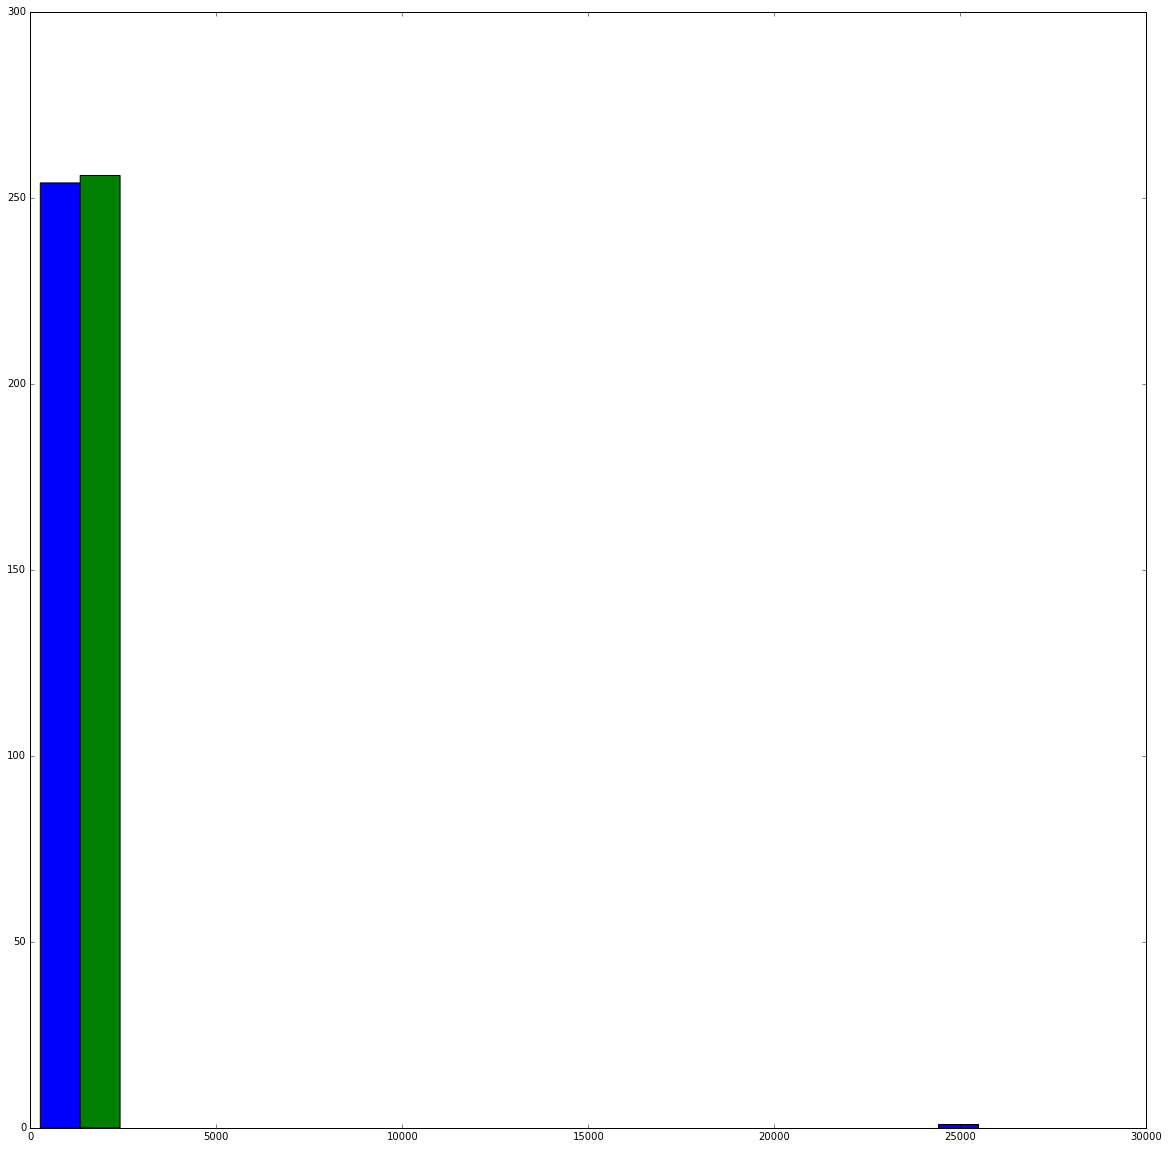

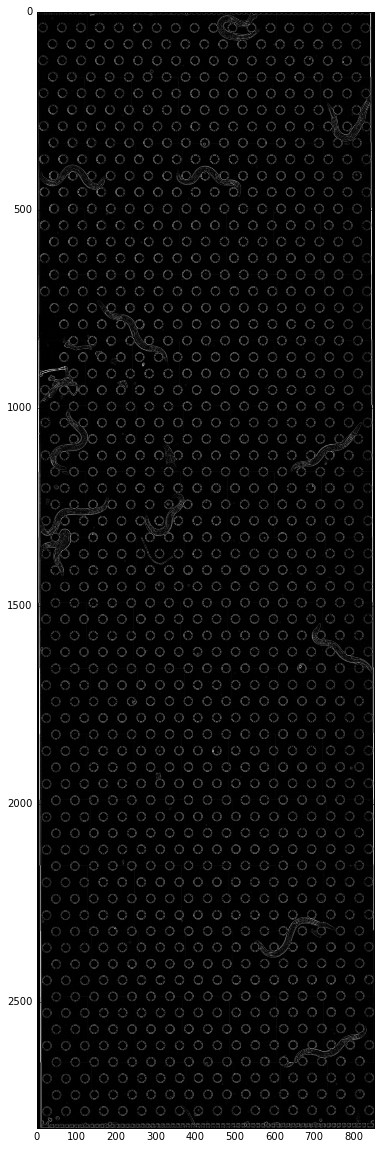

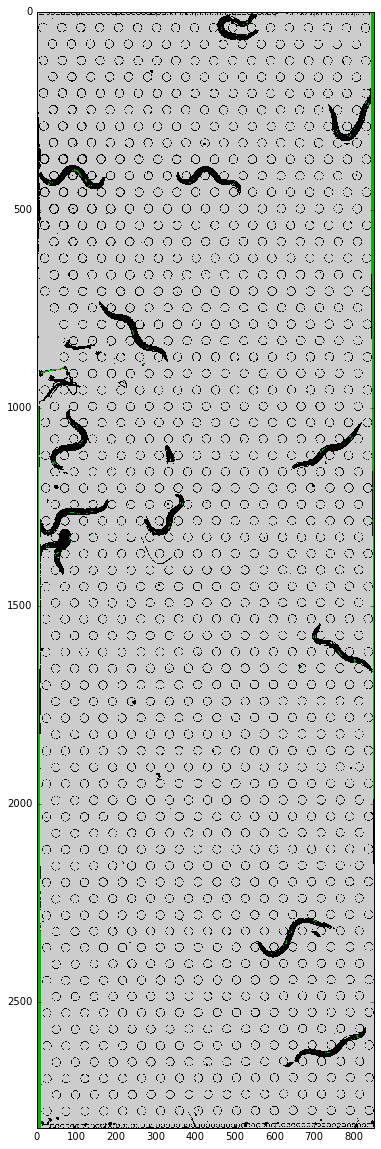

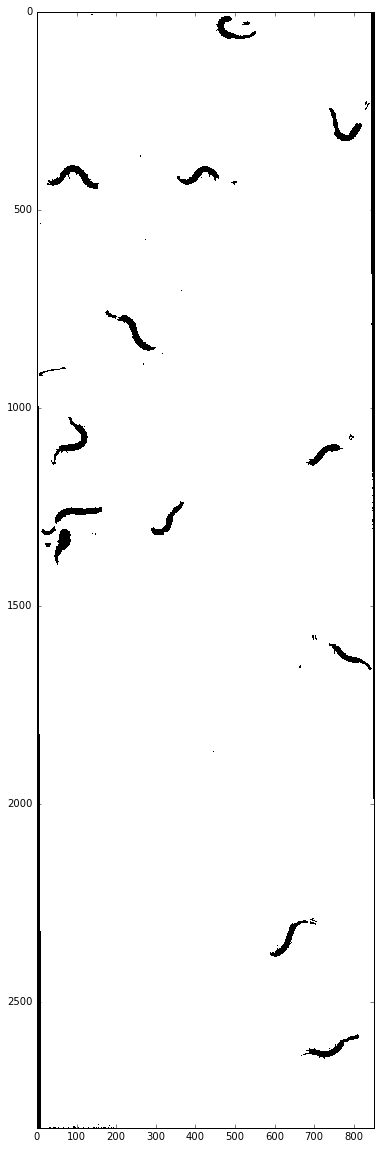

In [107]:
img_rmv = basics(filename)

In [110]:
print img_rmv.max()

2


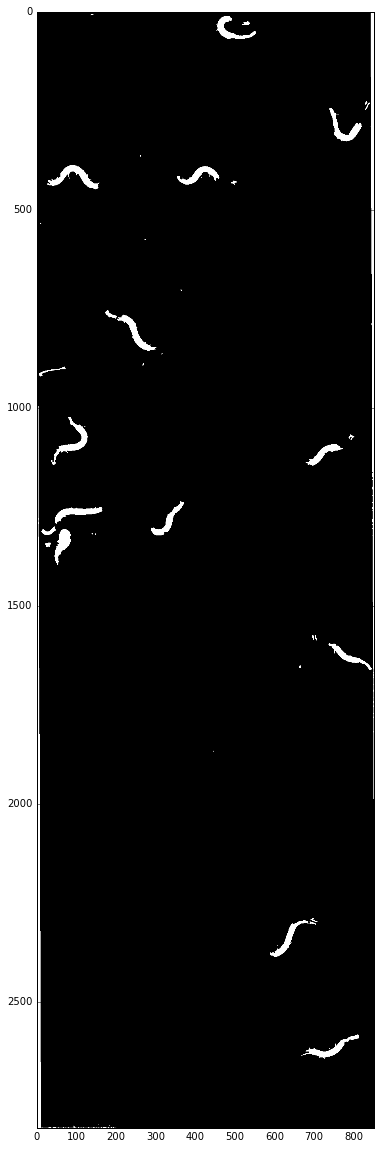

In [111]:
img_rmv[img_rmv>1] = 0
img_rmv[img_rmv == 1] = 2
# img_rmv[img_rmv == 0] = 1
plt.imshow(img_rmv, cmap = 'gray')

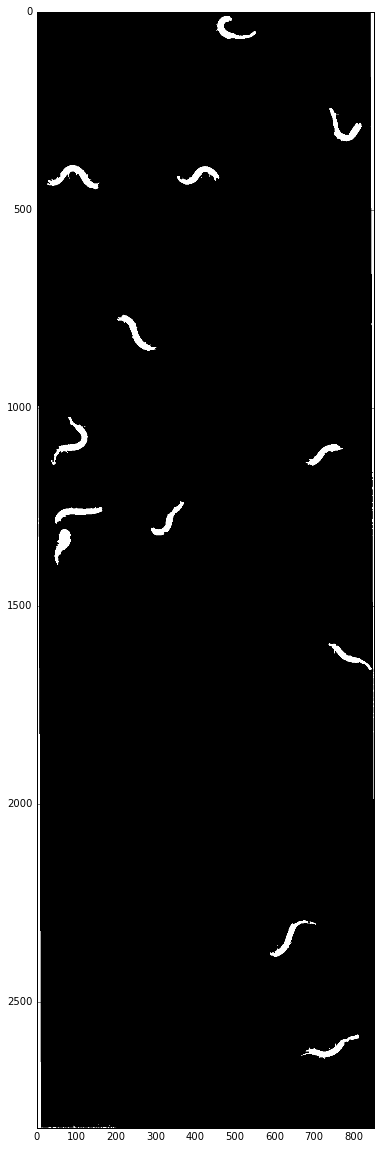

In [112]:
label_objects, nb_labels = ndi.label(img_rmv, ones((3,3)))
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 400
mask_sizes[0] = 0
worms_cleaned = mask_sizes[label_objects]
# plt.imshow(label_objects)
plt.imshow(worms_cleaned, cmap='gray')

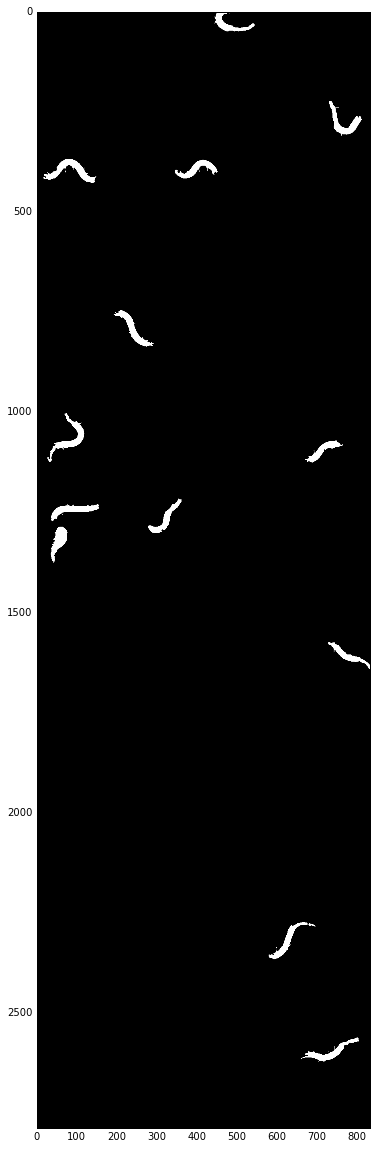

In [116]:
rows = worms_cleaned.shape[0]
cols = worms_cleaned.shape[1]
roi = worms_cleaned[20:rows-10,10:cols-10]
plt.imshow(roi, cmap='gray')

In [117]:
height, width = roi.shape
pad_south = 255 * ones((1, width))
pad_east = 255 * ones((height + 1, 1))
bw_padded = hstack((vstack((roi, pad_south)), pad_east))

13
[[0 0 0 ..., 0 2 2]
 [0 0 0 ..., 0 2 2]
 [0 0 0 ..., 0 2 2]
 ..., 
 [0 0 0 ..., 0 0 2]
 [0 0 0 ..., 0 0 2]
 [2 2 2 ..., 2 2 2]]


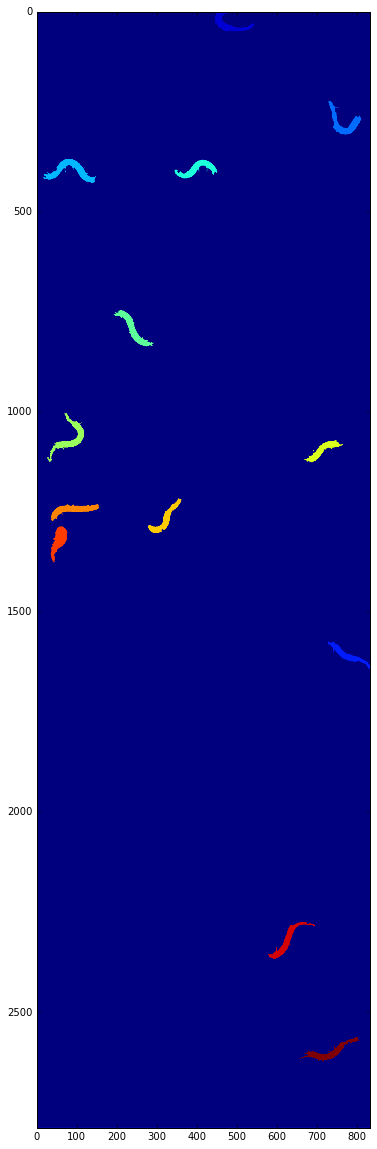

In [118]:

labeled2, n2 = ndi.label(bw_padded)
print n2
objects_per_unit_area2 = (n2-1) * 1.0 / roi.size
plt.imshow(labeled2)
print labeled2

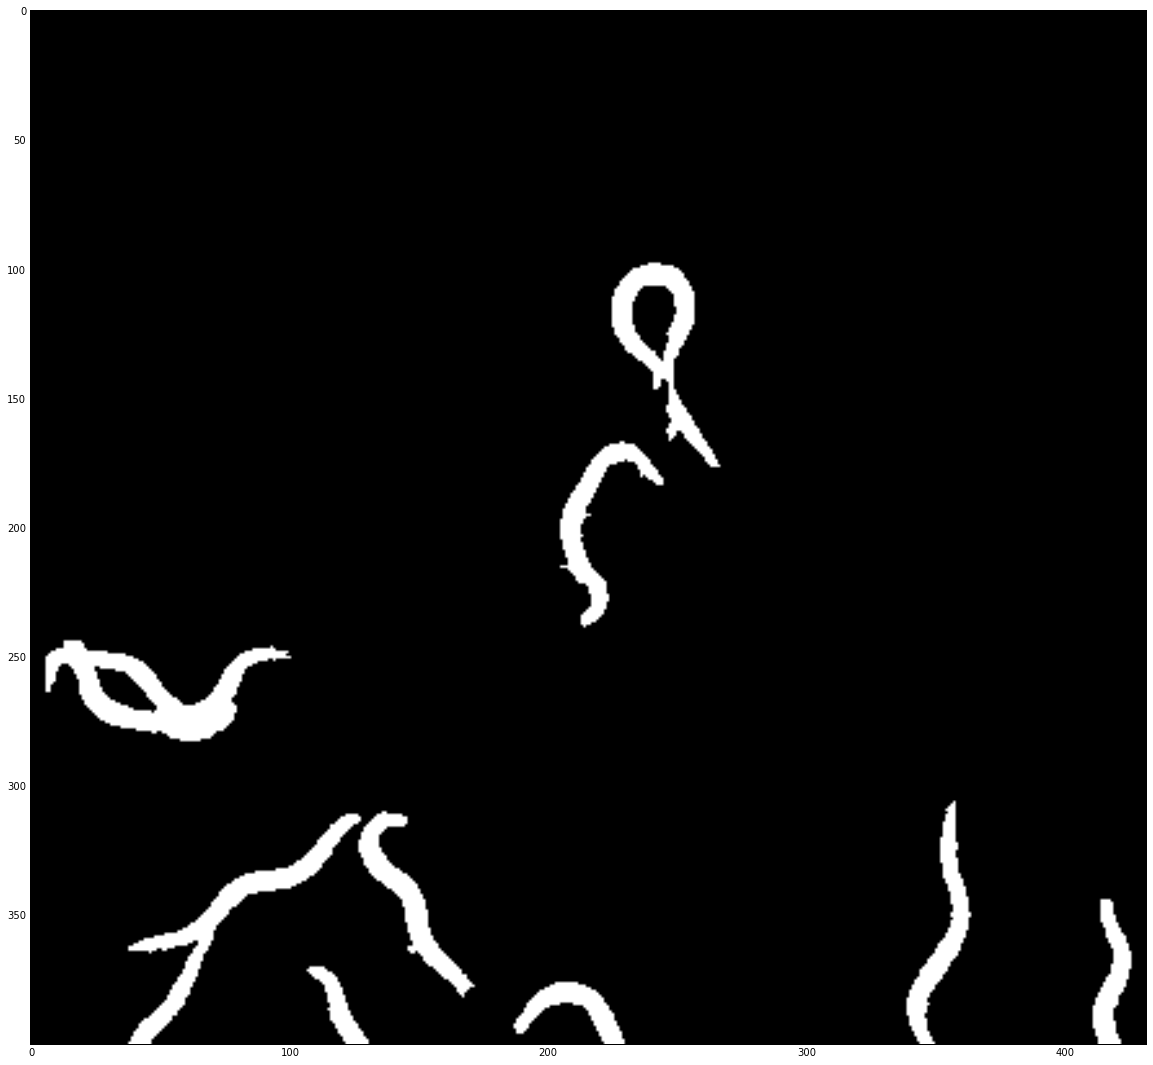

In [101]:
roi2 = worms_cleaned[400:800,10:cols-10]
plt.imshow(roi2, cmap='gray')

5


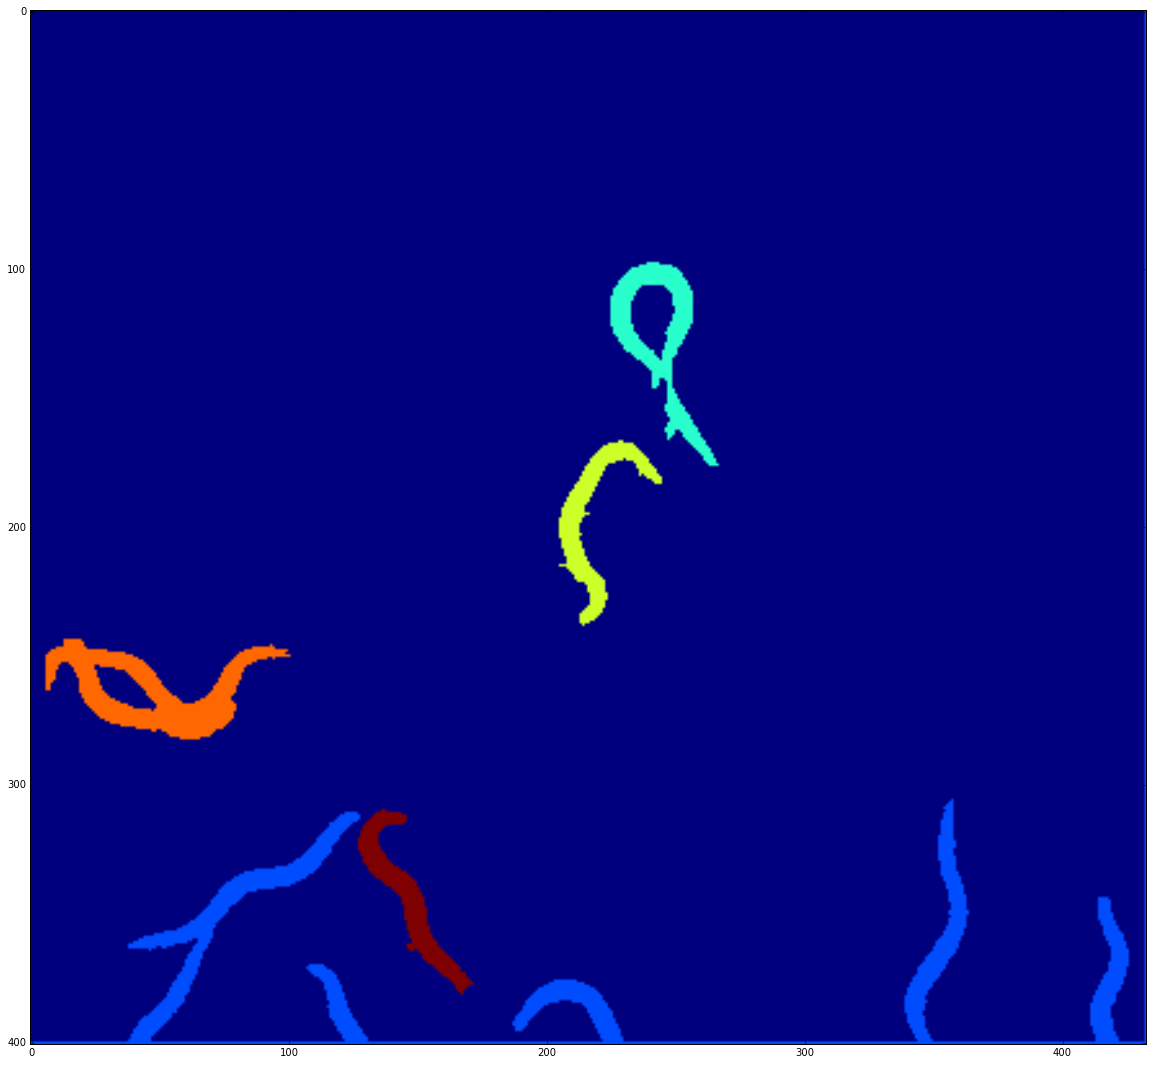

In [102]:
height, width = roi2.shape
pad_south = 255 * ones((1, width))
pad_east = 255 * ones((height + 1, 1))
bw_padded = hstack((vstack((roi2, pad_south)), pad_east))
labeled2, n2 = ndi.label(bw_padded, ones((3,3)))
print n2
objects_per_unit_area2 = (n2-1) * 1.0 / roi.size
plt.imshow(labeled2)
